In [1]:
import cv2
import os
import random
import matplotlib.image as img
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import numpy as np

posCOVDir = "../scans/CT_COVID"
negCOVDir = "../scans/CT_NonCOVID"
print(os.path.exists(posCOVDir))
absPosPath = os.path.abspath(posCOVDir)
print(absPosPath)
absNegPath = os.path.abspath(negCOVDir)

True
D:\Official\Georgia Tech\Fall 2020\CS 4641\Lung-COVID-Detection\code\scans\CT_COVID


In [15]:
#gets random positive covid images to analyze
def getPosImg():
    try:
        posFiles = os.listdir(posCOVDir)
        d = random.choice(posFiles)
        imgPath = os.path.join(absPosPath, d) 
        print(imgPath)
        posImg = img.imread(imgPath)
    except:
        posFiles = os.listdir(posCOVDir)
        d = random.choice(posFiles)
        imgPath = os.path.join(absPosPath, d) 
        print(imgPath)
        posImg = img.imread(imgPath)
    return posImg

In [16]:
#gets random negateive covid images to analyze
def getNegImg():
    try:
        negFiles = os.listdir(negCOVDir)
        d = random.choice(negFiles)
        imgPath = os.path.join(absNegPath, d) 
        print(imgPath)

        negImg = img.imread(imgPath)
    except:
        negFiles = os.listdir(negCOVDir)
        d = random.choice(negFiles)
        imgPath = os.path.join(absNegPath, d) 
        print(imgPath)
        negImg = img.imread(imgPath)

    return negImg

In [21]:
posImg = getPosImg()


D:\Official\Georgia Tech\Fall 2020\CS 4641\Lung-COVID-Detection\code\scans\CT_COVID\2020.03.18.20038125-p16-56-5.png
D:\Official\Georgia Tech\Fall 2020\CS 4641\Lung-COVID-Detection\code\scans\CT_COVID\2020.02.10.20021584-p6-52%9.png


In [18]:
negImg = getNegImg()

D:\Official\Georgia Tech\Fall 2020\CS 4641\Lung-COVID-Detection\code\scans\CT_NonCOVID\2039.png


In [41]:
def positiveImgDBSCAN(posImg, epsi):
    labimg = cv2.cvtColor(posImg, cv2.COLOR_BGR2LAB)

    n = 0
    while(n<4):
        labimg = cv2.pyrDown(labimg)
        n = n+1

    feature_image=np.reshape(labimg, [-1, 3])
    rows, cols, chs = labimg.shape

    print(posImg.shape)
    db = DBSCAN(eps = epsi, min_samples=50, metric = 'euclidean',algorithm ='auto')
    db.fit(feature_image)
    labels = db.labels_

    indices = np.dstack(np.indices(labimg.shape[:2]))
    xycolors = np.concatenate((labimg, indices), axis=-1) 
    feature_image2 = np.reshape(xycolors, [-1,5])
    db.fit(feature_image2)
    labels2 = db.labels_

    resultImg = np.reshape(labels2, [rows, cols])

    return resultImg

(202, 287, 3)


(-0.5, 17.5, 12.5, -0.5)

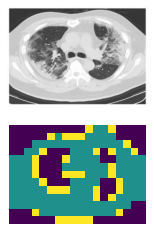

In [42]:
resultPosImg = positiveImgDBSCAN(posImg,8.45)

plt.figure(2)
plt.subplot(2, 1, 1)
plt.imshow(posImg)
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(resultPosImg)
plt.axis('off')

In [8]:
def negativeImgDBSCAN(negImg, epsi):
    labimg = cv2.cvtColor(negImg, cv2.COLOR_BGR2LAB)

    n = 0
    while(n<4):
        labimg = cv2.pyrDown(labimg)
        n = n+1

    feature_image=np.reshape(labimg, [-1, 3])
    rows, cols, chs = labimg.shape

    print(posImg.shape)
    db = DBSCAN(eps=epsi, min_samples=50, metric = 'euclidean',algorithm ='auto')
    db.fit(feature_image)
    labels = db.labels_

    indices = np.dstack(np.indices(labimg.shape[:2]))
    xycolors = np.concatenate((labimg, indices), axis=-1) 
    feature_image2 = np.reshape(xycolors, [-1,5])
    db.fit(feature_image2)
    labels2 = db.labels_

    resultImg = np.reshape(labels2, [rows, cols])
    return resultImg

(407, 600)


(-0.5, 21.5, 17.5, -0.5)

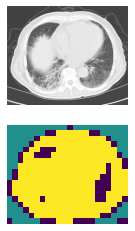

In [9]:
resultNegImg = negativeImgDBSCAN(negImg,18.574)

plt.figure(2)
plt.subplot(2, 1, 1)
plt.imshow(negImg)
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(resultNegImg)
plt.axis('off')

In [10]:
#TODO FIX THIS 
def getPlotImg(n_img = 5):
    arrPosImg = []
    processedPosImg= []
    arrNegImg = []
    processedNegImg = []
    for i in range(n_img):
        arrPosImg.append(getPosImg())
        arrNegImg.append(getNegImg())
        processedPosImg.append(positiveImgDBSCAN(arrPosImg[i]))
        processedNegImg.append(negativeImgDBSCAN(arrNegImg[i]))
    return arrPosImg, processedPosImg, arrNegImg, processedNegImg
        

In [11]:
n_img = 2
arrPos, proPos, arrNeg, proNeg = getPlotImg(n_img)
for i in range(n_img):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(arrPos[i], cmap=plt.cm.bone)

D:\Official\Georgia Tech\Fall 2020\CS 4641\Lung-COVID-Detection\code\scans\CT_COVID\Ni2020_Article_CombinationOfWesternMedicineAn-p4-13%0.png
D:\Official\Georgia Tech\Fall 2020\CS 4641\Lung-COVID-Detection\code\scans\CT_NonCOVID\63%5.jpg


TypeError: positiveImgDBSCAN() missing 1 required positional argument: 'epsi'

In [12]:
#img processing
greyPosImg = cv2.cvtColor(posImg, cv2.COLOR_BGR2GRAY)

plt.imshow(greyPosImg)
print(greyPosImg.shape)


error: OpenCV(4.1.0) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<1,-1,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [13]:
#sklearn DBSCAN code
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
X = StandardScaler().fit_transform(greyPosImg)
plt.imshow(X)
db = DBSCAN(eps=15, min_samples=40).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
plt.imshow(np.add(greyPosImg, labels[:,np.newaxis]))
print(labels)


NameError: name 'greyPosImg' is not defined